<a href="https://colab.research.google.com/github/rithz623/Research1/blob/main/APR_Control_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

______________________________________________________________________________

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load all datasets
file_paths = [
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/Py1.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/jan10_aud.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/jan13 audposter:void.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/jan28_nonposter.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/poster_jan31.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/nonposter-1:14.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/placebo_jan24_reading.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/poster_void_feb3.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/poster/feb5_poster.csv",
    "/content/drive/MyDrive/AP RESEARCH DATA/placebo/void2jan17.csv"
]

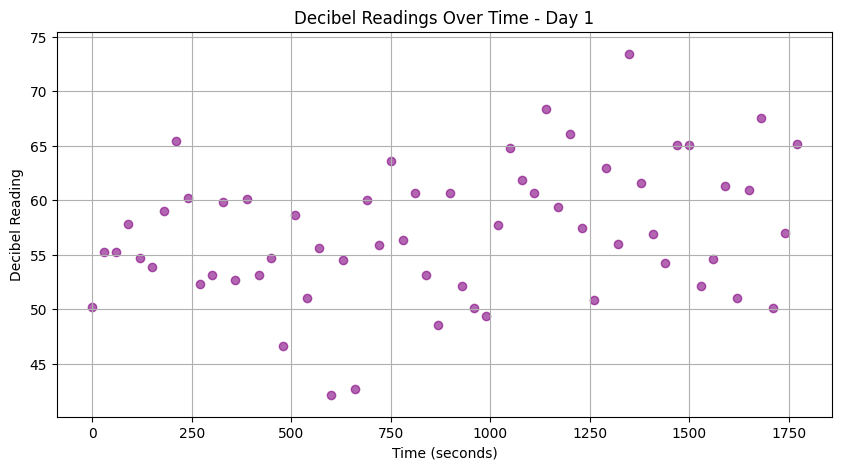

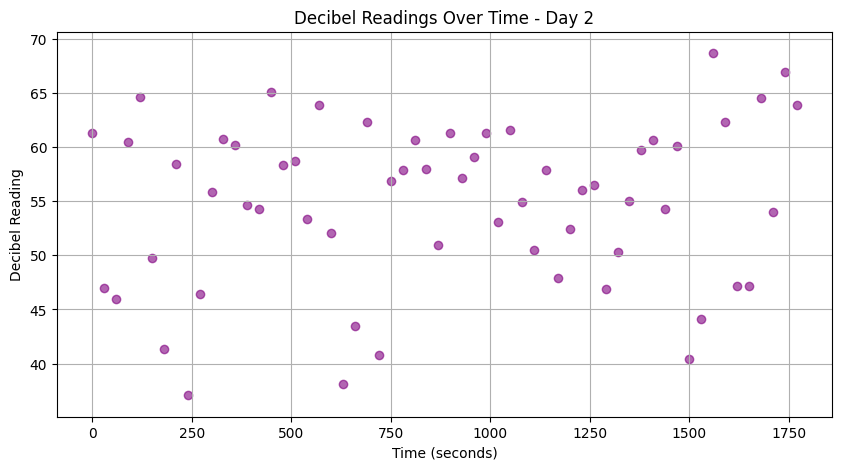

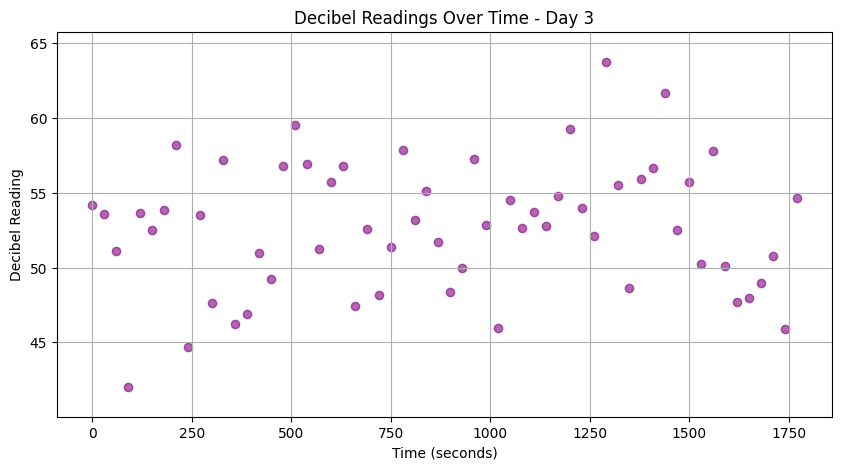

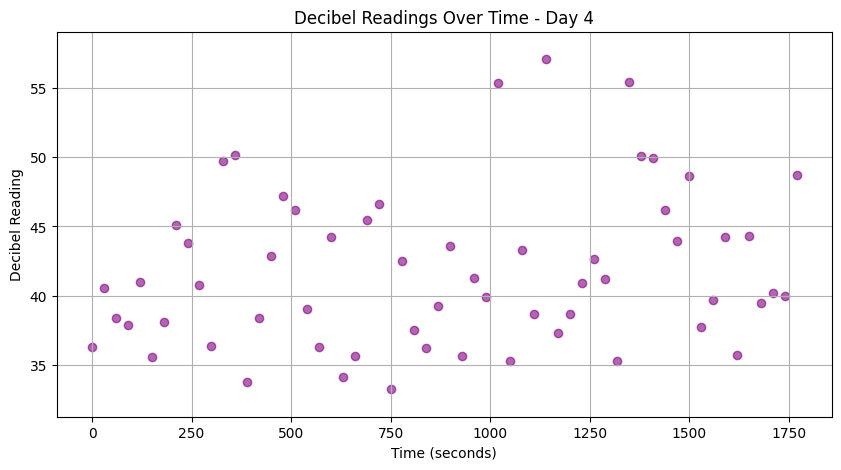

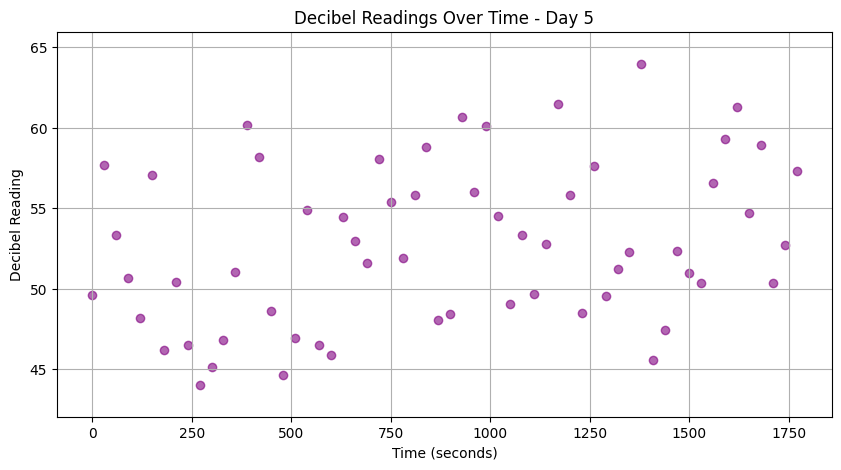

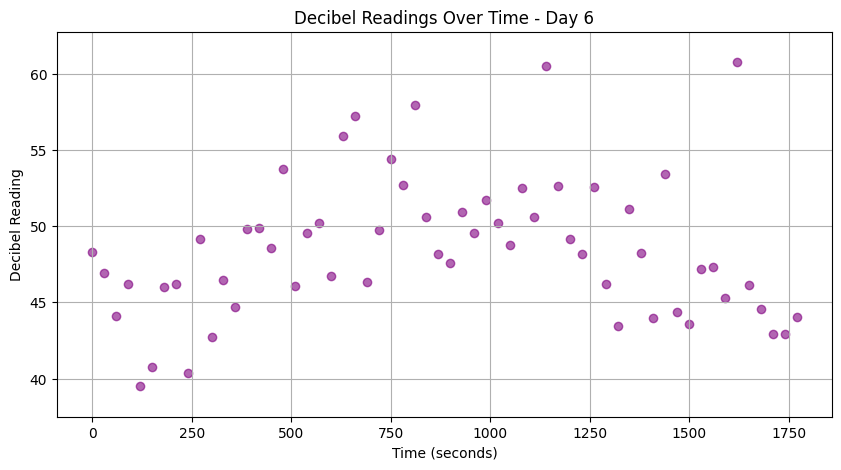

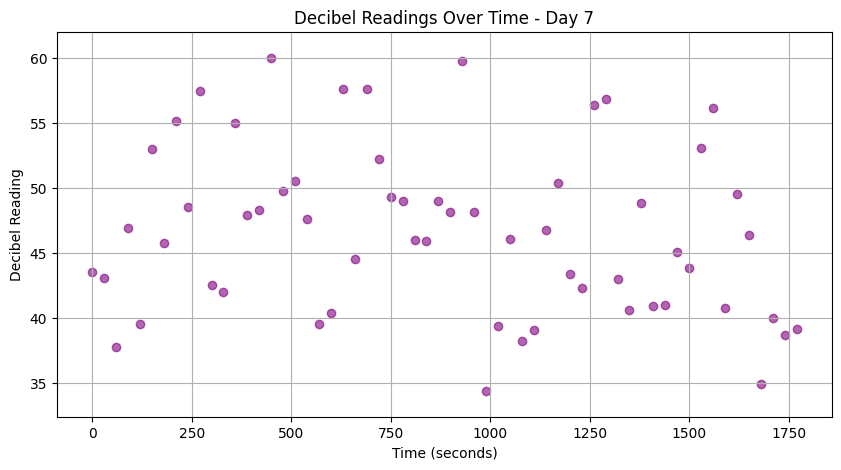

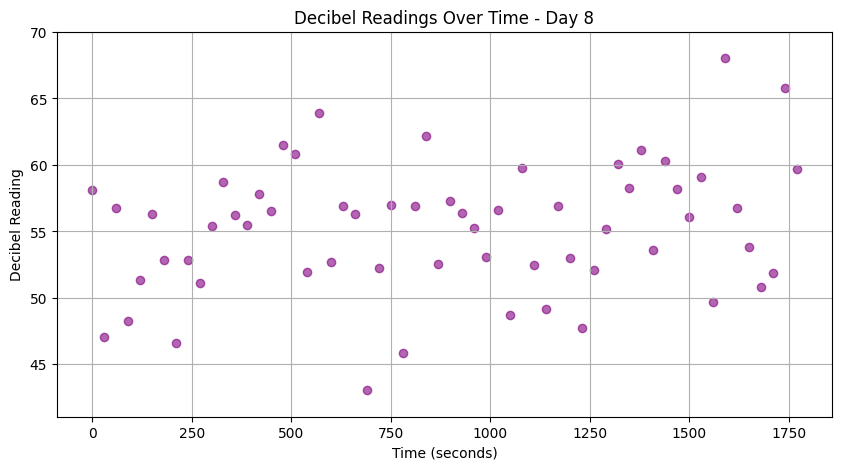

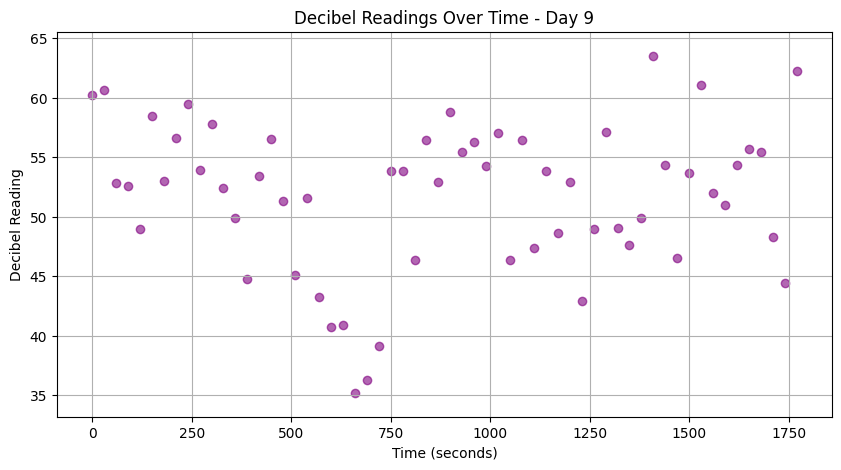

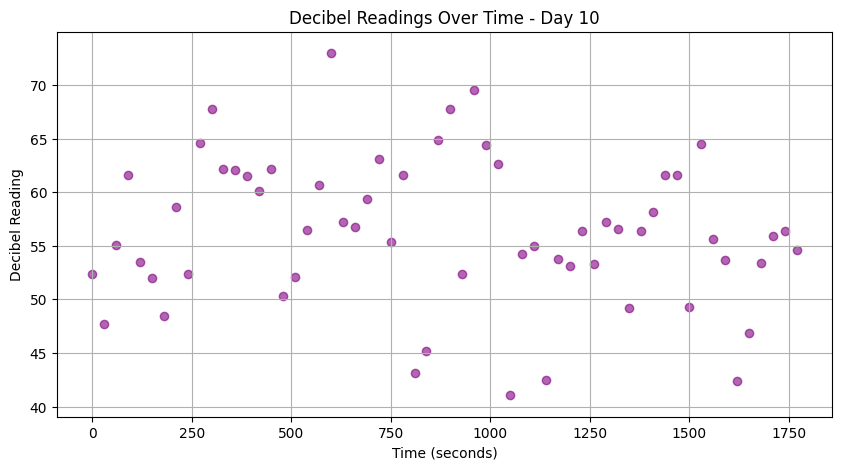

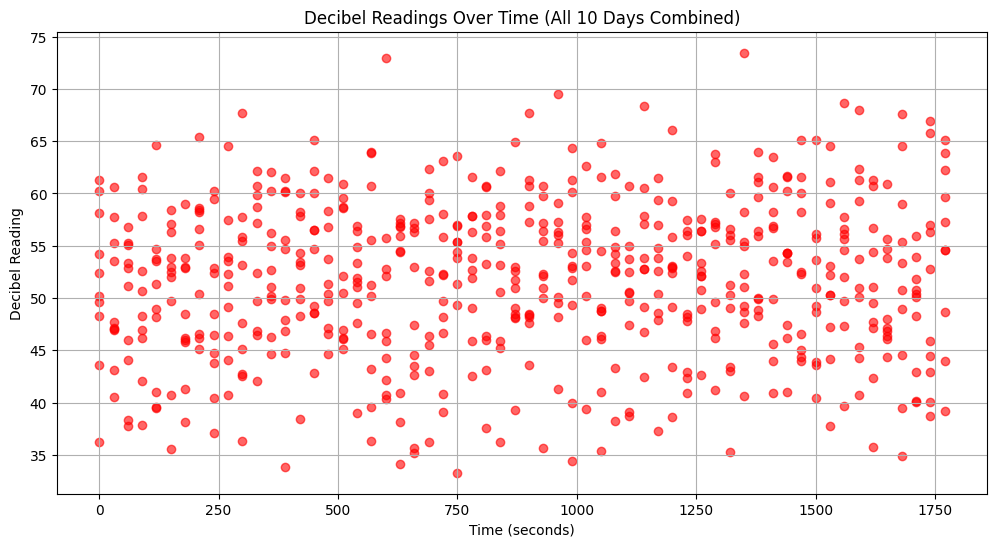

In [ ]:

# List to store filtered data for final combined plot
filtered_dfs = []

# Generate 10 separate plots (one per day)
for i, file in enumerate(file_paths):
    # Read file
    df = pd.read_csv(file)
    df = df.drop(columns=['S.N'])  # Drop S.N column
    df.columns = ['Time (30 sec)', 'Decibel Reading']

    # Select middle 60 rows
    middle_index = len(df) // 2
    df = df.iloc[middle_index - 30: middle_index + 30]

    # Adjust time (keeping 30 sec intervals)
    df['Time (30 sec)'] = np.arange(0, len(df) * 30, 30)

    # Store filtered data
    filtered_dfs.append(df)

    # Plot each day's decibel readings
    plt.figure(figsize=(10, 5))
    plt.scatter(df['Time (30 sec)'], df['Decibel Reading'], alpha=0.6, color='purple')
    plt.title(f'Decibel Readings Over Time - Day {i+1}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Decibel Reading')
    plt.ylim(df['Decibel Reading'].min() - 2, df['Decibel Reading'].max() + 2)
    plt.grid(True)
    plt.show()

# Merge all filtered data
df_combined = pd.concat(filtered_dfs, ignore_index=True)

# Create combined graph
plt.figure(figsize=(12, 6))
plt.scatter(df_combined['Time (30 sec)'], df_combined['Decibel Reading'], alpha=0.6, color='red')
plt.title('Decibel Readings Over Time (All 10 Days Combined)')
plt.xlabel('Time (seconds)')
plt.ylabel('Decibel Reading')
plt.ylim(df_combined['Decibel Reading'].min() - 2, df_combined['Decibel Reading'].max() + 2)
plt.grid(True)
plt.show()


Mean: 51.74 dB
Median: 52.39 dB
Standard Deviation: 7.40 dB
Min: 33.29 dB
Max: 73.46 dB


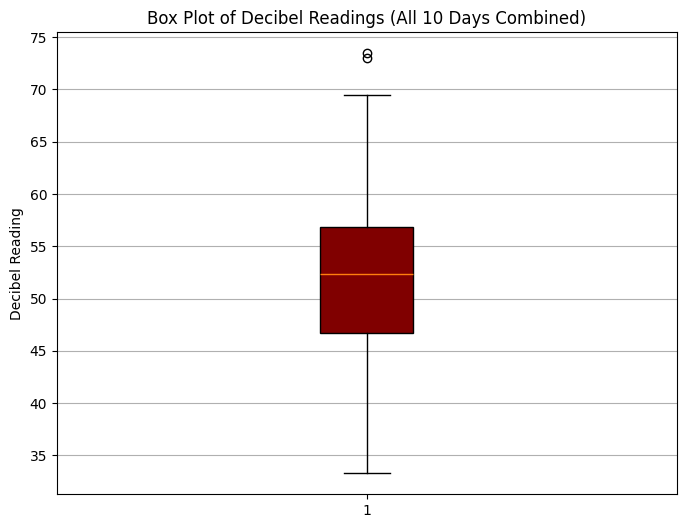

In [ ]:
# Calculate descriptive statistics
mean = df_combined['Decibel Reading'].mean()
median = df_combined['Decibel Reading'].median()
std_dev = df_combined['Decibel Reading'].std()
minimum = df_combined['Decibel Reading'].min()
maximum = df_combined['Decibel Reading'].max()

# Print the stats
print(f"Mean: {mean:.2f} dB")
print(f"Median: {median:.2f} dB")
print(f"Standard Deviation: {std_dev:.2f} dB")
print(f"Min: {minimum:.2f} dB")
print(f"Max: {maximum:.2f} dB")

# Create box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df_combined['Decibel Reading'], vert=True, patch_artist=True, boxprops=dict(facecolor='maroon'))
plt.title('Box Plot of Decibel Readings (All 10 Days Combined)')
plt.ylabel('Decibel Reading')
plt.grid(True, axis='y')
plt.show()